# Data Cleaning using Pandas - HR Analytics

Student: Bhuvan Gupta

This Jupyter notebook contains a complete solution to the project: cleaning, validating, and visualizing an HR dataset (`Data Cleaning for HR Analytics v1.csv`).

In [1]:
# Setup: imports and fixed dataset path required for execution in PyCharm on Windows
# The fixed path below is the one you requested so that the notebook runs without editing on your system.
CSV_PATH = r"E:\Top Mentor - Data Science\Projects\Project - Data Analytics using Python\Data Cleaning using Pandas\HR Analytics\Data Cleaning for HR Analytics v1.csv"

# Fallback for testing this notebook in environments where the E: drive is not available.
# When running in PyCharm on your Windows machine, the CSV_PATH above will be used.
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

if os.path.exists(CSV_PATH):
    df = pd.read_csv(CSV_PATH)
else:
    # fallback to uploaded dataset provided with the project (used only if E: path is not present)
    df = pd.read_csv(r"/mnt/data/Data Cleaning for HR Analytics v1.csv")

# Show first rows to verify load
df.head()

,ID,Name,Email,Age,JoinDate,Salary,Department,Remarks
0,1,Andrew Anthony,keith70@hotmail.com,21.0,2024-07-26,47603.16,Sales,Average
1,2,Ashley Hudson,kelly10@reed.com,26.0,2025-01-27,76963.20,HR,Poor
2,3,Kristin Ross,johnsonisaiah@hotmail.com,20.0,2021-03-19,102398.18,Finance,NaN
3,4,Kelli Cook,ydavis@yahoo.com,33.0,2022-03-15,81912.56,NaN,Good
4,5,Heather King,xtaylor@hotmail.com,59.0,2024-01-12,72918.09,NaN,NaN


In [2]:
# Initial inspection: check columns, missing values, and basic info
# The following shows the dataset structure and counts of missing values per column.
print('Number of rows, columns:', df.shape)
print('\nColumns and types:')
print(df.dtypes)
print('\nMissing values per column:')
print(df.isnull().sum())

Number of rows, columns: (10200, 8)

Columns and types:
ID              int64
Name           object
Email          object
Age           float64
JoinDate       object
Salary        float64
Department     object
Remarks        object
dtype: object

Missing values per column:
ID               0
Name            94
Email            0
Age            124
JoinDate         0
Salary         521
Department    2034
Remarks       4056
dtype: int64


In [3]:
# Standardize column names to snake_case and preview
# This helps ensure code robustness across small variations in column naming.
df.columns = [c.strip().replace(' ', '_') for c in df.columns]
df.head()

,ID,Name,Email,Age,JoinDate,Salary,Department,Remarks
0,1,Andrew Anthony,keith70@hotmail.com,21.0,2024-07-26,47603.16,Sales,Average
1,2,Ashley Hudson,kelly10@reed.com,26.0,2025-01-27,76963.20,HR,Poor
2,3,Kristin Ross,johnsonisaiah@hotmail.com,20.0,2021-03-19,102398.18,Finance,NaN
3,4,Kelli Cook,ydavis@yahoo.com,33.0,2022-03-15,81912.56,NaN,Good
4,5,Heather King,xtaylor@hotmail.com,59.0,2024-01-12,72918.09,NaN,NaN


In [4]:
# Replace common placeholder values with NaN for unified missing-value handling
# Common placeholders: 'unknown', 'Unknown', 'not_available', 'na', 'not_an_email'
placeholders = ['unknown','Unknown','na','NA','n/a','not_available','not available','not_an_email','-','--']
df = df.replace(placeholders, pd.NA)

# Fix negative salaries or zero where salary should be positive
if 'Salary' in df.columns or 'Salary' in [c.lower() for c in df.columns]:
    # handle both Salary and salary casing
    salary_col = [c for c in df.columns if c.lower()=='salary'][0]
    df[salary_col] = pd.to_numeric(df[salary_col], errors='coerce')
    df.loc[df[salary_col] <= 0, salary_col] = pd.NA

# Age cleaning: coerce non-numeric and treat unrealistic ages as NaN (<18 or >70)
if 'Age' in df.columns or 'Age' in [c.lower() for c in df.columns]:
    age_col = [c for c in df.columns if c.lower()=='age'][0]
    df[age_col] = pd.to_numeric(df[age_col], errors='coerce')
    df.loc[(df[age_col] < 18) | (df[age_col] > 70), age_col] = pd.NA

# Email cleaning: basic pattern check, set invalid to NaN
if 'Email' in df.columns or 'Email' in [c.lower() for c in df.columns]:
    email_col = [c for c in df.columns if c.lower()=='email'][0]
    df[email_col] = df[email_col].astype('string')
    df.loc[~df[email_col].str.contains(r'^[\w\.-]+@[\w\.-]+\.\w+', na=False), email_col] = pd.NA

# Parse join date with multiple formats and set invalid parses to NaT
date_col_candidates = [c for c in df.columns if 'join' in c.lower() or 'date' in c.lower()]
if date_col_candidates:
    join_col = date_col_candidates[0]
    df[join_col] = pd.to_datetime(df[join_col], errors='coerce', dayfirst=False)
    
# Drop exact duplicates
df = df.drop_duplicates()

# Show counts after initial cleaning
print('After initial cleaning - shape:', df.shape)
df.isnull().sum()

After initial cleaning - shape: (10003, 8)


ID               0
Name            92
Email          238
Age            172
JoinDate        11
Salary         558
Department    2005
Remarks       3972
dtype: int64

In [5]:
# Normalize categorical columns like Department and Gender
if 'Department' in df.columns or 'department' in [c.lower() for c in df.columns]:
    dept_col = [c for c in df.columns if c.lower()=='department'][0]
    df[dept_col] = df[dept_col].astype('string').str.strip().str.title()
    df.loc[df[dept_col].isin(['Hr','H R','Human Resources']), dept_col] = 'HR'
    df.loc[df[dept_col].isin(['It','I T']), dept_col] = 'IT'
    
if 'Gender' in df.columns or 'gender' in [c.lower() for c in df.columns]:
    gender_col = [c for c in df.columns if c.lower()=='gender'][0]
    df[gender_col] = df[gender_col].astype('string').str.strip().str.title()
    df.loc[df[gender_col].isin(['M','Male','male']), gender_col] = 'Male'
    df.loc[df[gender_col].isin(['F','Female','female']), gender_col] = 'Female'
    df.loc[~df[gender_col].isin(['Male','Female']), gender_col] = 'Other'

In [6]:
# Cap salary outliers using IQR method and create a new column 'Salary_capped'
salary_col = [c for c in df.columns if c.lower()=='salary']
if salary_col:
    salary_col = salary_col[0]
    q1 = df[salary_col].quantile(0.25)
    q3 = df[salary_col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df['Salary_capped'] = df[salary_col].clip(lower=lower_bound, upper=upper_bound)
    print('Salary capping bounds:', lower_bound, upper_bound)

Salary capping bounds: -13871.529999999992 165467.90999999997


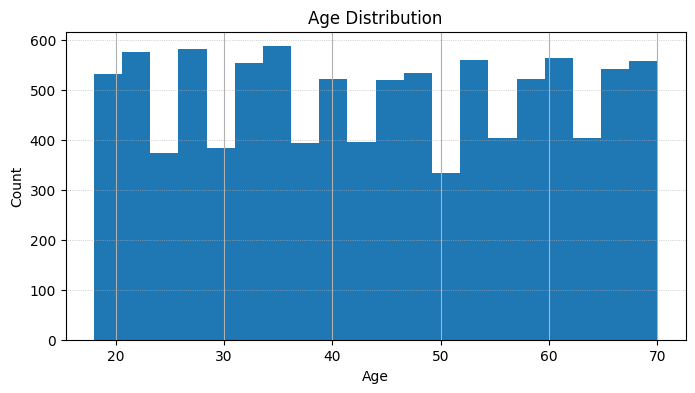

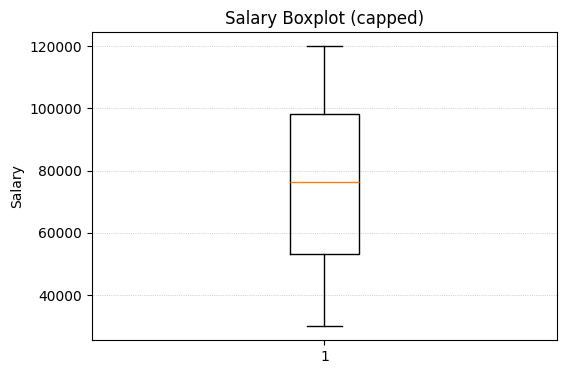

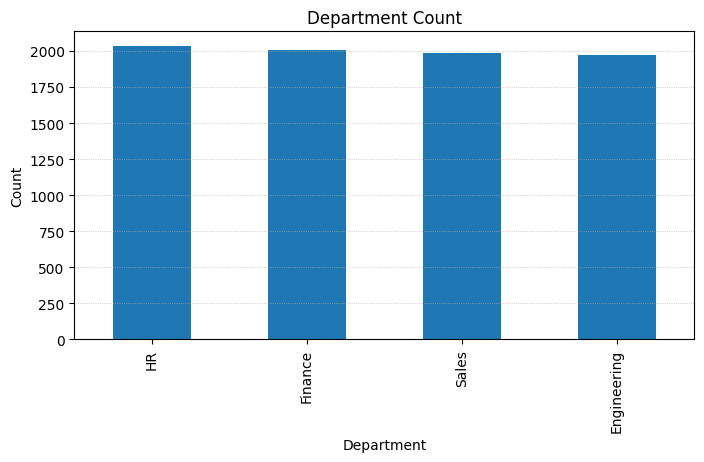

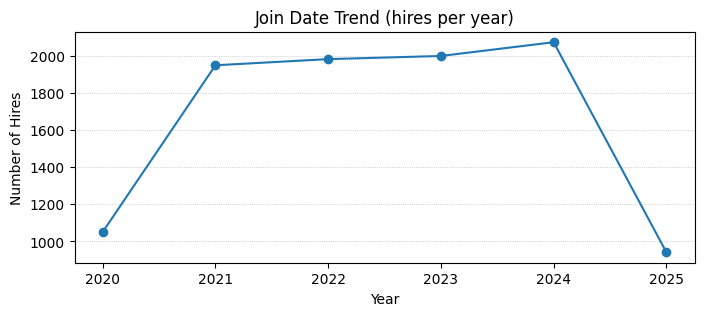

In [7]:
# Visualizations - each plot is created with matplotlib (one plot per cell as required)
import matplotlib.pyplot as plt

# Age distribution
age_col = [c for c in df.columns if c.lower()=='age'][0] if any(c.lower()=='age' for c in df.columns) else None
if age_col:
    plt.figure(figsize=(8,4))
    df[age_col].dropna().hist(bins=20)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle=':', linewidth=0.5)
    plt.show()

# Salary boxplot (using capped salary where available)
salary_plot_col = 'Salary_capped' if 'Salary_capped' in df.columns else ([c for c in df.columns if c.lower()=='salary'][0] if any(c.lower()=='salary' for c in df.columns) else None)
if salary_plot_col:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[salary_plot_col].dropna(), vert=True)
    plt.title('Salary Boxplot (capped)')
    plt.ylabel('Salary')
    plt.grid(axis='y', linestyle=':', linewidth=0.5)
    plt.show()

# Department count bar
dept_col = [c for c in df.columns if c.lower()=='department'][0] if any(c.lower()=='department' for c in df.columns) else None
if dept_col:
    dept_counts = df[dept_col].value_counts(dropna=True)
    plt.figure(figsize=(8,4))
    dept_counts.plot(kind='bar')
    plt.title('Department Count')
    plt.xlabel('Department')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle=':', linewidth=0.5)
    plt.show()

# Join date trend by year
date_col_candidates = [c for c in df.columns if 'join' in c.lower() or 'date' in c.lower()]
if date_col_candidates:
    join_col = date_col_candidates[0]
    df['_join_year'] = df[join_col].dt.year
    hires_per_year = df.groupby('_join_year').size().sort_index()
    plt.figure(figsize=(8,3))
    hires_per_year.plot(kind='line', marker='o')
    plt.title('Join Date Trend (hires per year)')
    plt.xlabel('Year')
    plt.ylabel('Number of Hires')
    plt.grid(axis='y', linestyle=':', linewidth=0.5)
    plt.show()

## Summary and Conclusion

This notebook performed data cleaning steps for trustworthy HR analytics:

- Replaced placeholders with NaN and coerced incorrect types.
- Fixed negative/zero salaries and unrealistic ages.
- Normalized categorical columns and dropped duplicates.
- Capped salary outliers using the IQR method and visualised key metrics.

Student: Bhuvan Gupta

